In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
d1 =pd.read_csv('all_assets_637716313477993363.csv')
d2 =pd.read_csv('all_assets_637716341491527846.csv')
d2 = d2[d2[' LONGITUDE'] > -100]

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


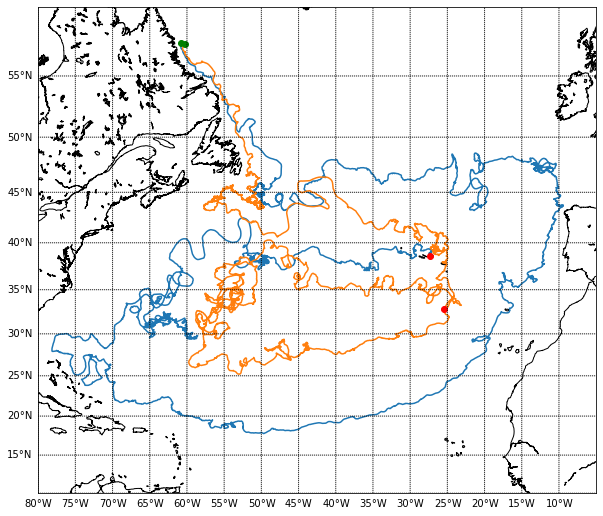

In [3]:

fig, ax = plt.subplots(1,1,figsize=(10,10))
lat_min=10
lat_max=60
lon_min=-80
lon_max=-5
bmap = Basemap(projection='merc',llcrnrlat=lat_min,llcrnrlon=lon_min, urcrnrlat=lat_max, urcrnrlon=lon_max,
               resolution='i', 
               ax=ax)
for d in [d1, d2]:
    x,y =bmap(d[' LONGITUDE'].values, d[" LATITUDE"].values)
    bmap.plot(x,y)
    bmap.plot(x[0], y[0], 'ro')
    bmap.plot(x[-1], y[-1], 'go')
bmap.drawcoastlines()
bmap.drawmeridians(np.arange(lon_min, lon_max, 5),labels=[0,0,0,1])
bmap.drawparallels(np.arange(lat_min, lat_max, 5), labels=[1,0,0,0])
plt.show()


In [4]:
count=0
for d in [d1, d2]:
    count+=1
    print('Drifter {}'.format(count))
    print(d['Data Date (UTC)'].values[0])
    print(d['Data Date (UTC)'].values[-1])

Drifter 1
2021-06-24 17:00:00
2015-10-22 13:40:00
Drifter 2
2021-10-13 22:00:00
2015-10-22 06:18:00


In [5]:
d.columns

Index(['Asset Name', 'Asset Id', 'Data Date (UTC)', ' LATITUDE', ' LONGITUDE',
       ' FMTID', ' YEAR', ' MONTH', ' DAY', ' HOUR', ' MIN', ' SST', ' BP',
       ' BPT', ' RANGE', ' VBAT', ' GPSDELAY', ' SNR', ' TTFF', ' SBDTIME',
       ' Report Body'],
      dtype='object')

In [6]:
fig.savefig('2015-SVPs.png', bbox_inches='tight')